#### 1. Analysing Time Series Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./BAJFINANCE.csv')

In [3]:
# VWAP --> volume weighted average price

In [4]:
df.head()

Date      Symbol Series  Prev Close   Open   High   Low   Last  \
0  2000-01-03  BAJAUTOFIN     EQ       46.95  49.45  50.75  46.5  50.75   
1  2000-01-04  BAJAUTOFIN     EQ       50.75  53.20  53.20  47.9  48.00   
2  2000-01-05  BAJAUTOFIN     EQ       48.10  46.55  47.40  44.6  44.60   
3  2000-01-06  BAJAUTOFIN     EQ       44.60  43.50  46.00  42.1  46.00   
4  2000-01-07  BAJAUTOFIN     EQ       45.25  48.00  48.00  42.0  42.90   

   Close   VWAP  Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
0  50.75  50.05    7600  3.803800e+10     NaN                 NaN          NaN  
1  48.10  48.56    5000  2.428000e+10     NaN                 NaN          NaN  
2  44.60  45.47    3500  1.591450e+10     NaN                 NaN          NaN  
3  45.25  44.43    6200  2.754750e+10     NaN                 NaN          NaN  
4  42.90  44.44    3500  1.555550e+10     NaN                 NaN          NaN

In [5]:
df.set_index(keys='Date', inplace=True)

In [6]:
df.sample(3)

Symbol Series  Prev Close    Open    High     Low    Last  \
Date                                                                        
2010-05-19  BAJAUTOFIN     EQ      483.00  483.00  483.00  456.85  473.50   
2005-02-23  BAJAUTOFIN     EQ      151.65  153.85  162.85  152.00  161.35   
2000-11-16  BAJAUTOFIN     EQ       28.75   28.25   28.25   28.25   28.25   

             Close    VWAP  Volume      Turnover  Trades  Deliverable Volume  \
Date                                                                           
2010-05-19  473.90  472.60  211306  9.986354e+12     NaN            116919.0   
2005-02-23  160.75  156.13  108446  1.693170e+12     NaN             88475.0   
2000-11-16   28.25   28.25     100  2.825000e+08     NaN                 NaN   

            %Deliverble  
Date                     
2010-05-19       0.5533  
2005-02-23       0.8158  
2000-11-16          NaN

<Axes: xlabel='Date'>

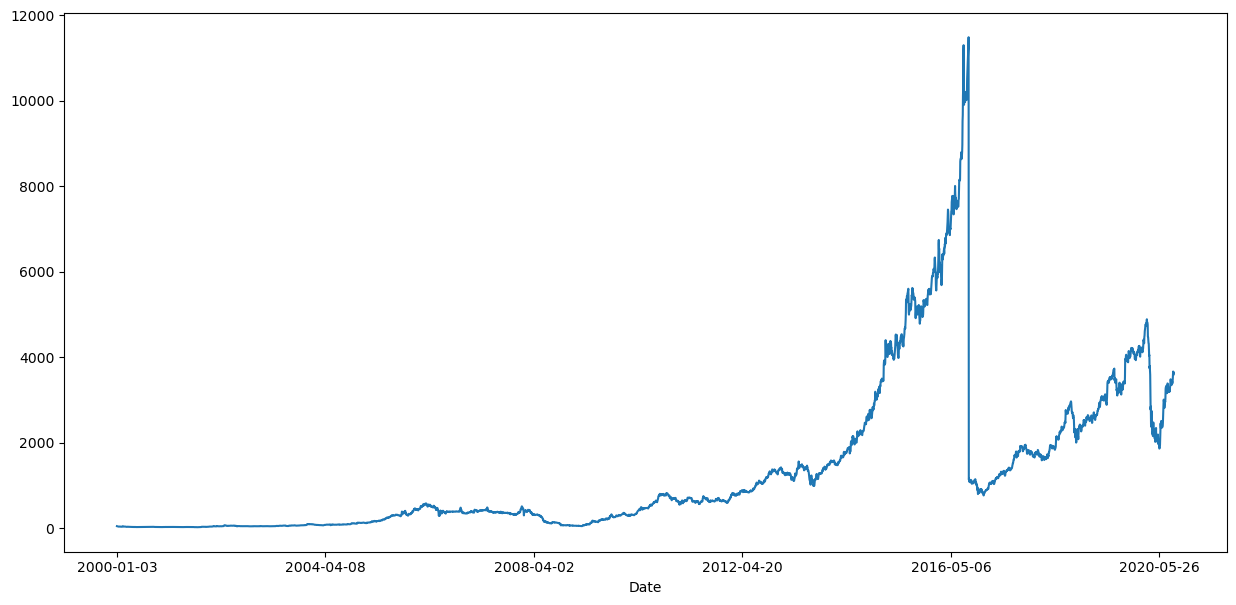

In [7]:
plt.figure(figsize=(15,7))
df['VWAP'].plot()

In [8]:
df.shape

(5070, 14)

In [9]:
df.isna().sum()/5070 *100

Symbol                 0.000000
Series                 0.000000
Prev Close             0.000000
Open                   0.000000
High                   0.000000
Low                    0.000000
Last                   0.000000
Close                  0.000000
VWAP                   0.000000
Volume                 0.000000
Turnover               0.000000
Trades                54.812623
Deliverable Volume     8.796844
%Deliverble            8.796844
dtype: float64

In [10]:
data = df.copy()

In [11]:
data.dropna(inplace=True)

In [12]:
data.shape

(2291, 14)

In [13]:
data.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

#### 2. Data Preparation for Time Series Forecasting

In [14]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [15]:
lag_features = ['High', 'Low', 'Volume', 'Turnover', 'Trades']
window1 = 3
window2 = 7

In [16]:
for feature in lag_features:
    data[feature+'_rolling_mean_3'] = data[feature].rolling(window=window1).mean()
    data[feature+'_rolling_mean_7'] = data[feature].rolling(window=window2).mean()

In [17]:
for feature in lag_features:
    data[feature+'_rolling_std_3'] = data[feature].rolling(window=window1).std()
    data[feature+'_rolling_std_7'] = data[feature].rolling(window=window2).std()

In [18]:
data

Symbol Series  Prev Close     Open     High      Low     Last  \
Date                                                                            
2011-06-01  BAJFINANCE     EQ      616.70   617.00   636.50   616.00   627.00   
2011-06-02  BAJFINANCE     EQ      631.85   625.00   638.90   620.00   634.00   
2011-06-03  BAJFINANCE     EQ      633.45   625.15   637.80   620.00   623.00   
2011-06-06  BAJFINANCE     EQ      625.00   620.00   641.00   611.35   611.35   
2011-06-07  BAJFINANCE     EQ      614.00   604.00   623.95   604.00   619.90   
...                ...    ...         ...      ...      ...      ...      ...   
2020-08-25  BAJFINANCE     EQ     3492.05  3525.00  3660.00  3510.00  3658.00   
2020-08-26  BAJFINANCE     EQ     3642.90  3665.00  3707.00  3631.00  3638.20   
2020-08-27  BAJFINANCE     EQ     3645.55  3656.95  3668.40  3596.40  3636.00   
2020-08-28  BAJFINANCE     EQ     3632.50  3650.00  3688.00  3617.05  3672.05   
2020-08-31  BAJFINANCE     EQ     3670.80  3715.00  3749.85  3465.00  3478.50   

              Close     VWAP   Volume  ...  High_rolling_std_3  \
Date                                   ...                       
2011-06-01   631.85   627.01     6894  ...                 NaN   
2011-06-02   633.45   636.04     2769  ...                 NaN   
2011-06-03   625.00   625.09    51427  ...            1.201388   
2011-06-06   614.00   616.03     5446  ...            1.625833   
2011-06-07   619.15   617.73     5991  ...            9.062422   
...             ...      ...      ...  ...                 ...   
2020-08-25  3642.90  3579.12  9854070  ...          111.840660   
2020-08-26  3645.55  3668.17  6665336  ...          100.081633   
2020-08-27  3632.50  3631.13  4611132  ...           25.064982   
2020-08-28  3670.80  3652.77  4251575  ...           19.300777   
2020-08-31  3487.80  3602.93  8529788  ...           42.512126   

            High_rolling_std_7  Low_rolling_std_3  Low_rolling_std_7  \
Date                                                                   
2011-06-01                 NaN                NaN                NaN   
2011-06-02                 NaN                NaN                NaN   
2011-06-03                 NaN           2.309401                NaN   
2011-06-06                 NaN           4.994080                NaN   
2011-06-07                 NaN           8.008797                NaN   
...                        ...                ...                ...   
2020-08-25           89.327396          69.777271          61.471880   
2020-08-26          116.819954         115.027609         100.638138   
2020-08-27          122.216500          62.320569         111.614377   
2020-08-28          124.544624          17.407781         119.736752   
2020-08-31          112.033479          82.473819         103.463256   

            Volume_rolling_std_3  Volume_rolling_std_7  \
Date                                                     
2011-06-01                   NaN                   NaN   
2011-06-02                   NaN                   NaN   
2011-06-03          2.698087e+04                   NaN   
2011-06-06          2.735270e+04                   NaN   
2011-06-07          2.639122e+04                   NaN   
...                          ...                   ...   
2020-08-25          3.613401e+06          2.348888e+06   
2020-08-26          1.987080e+06          2.403611e+06   
2020-08-27          2.641848e+06          2.408580e+06   
2020-08-28          1.302259e+06          2.404277e+06   
2020-08-31          2.373052e+06          2.517269e+06   

            Turnover_rolling_std_3  Turnover_rolling_std_7  \
Date                                                         
2011-06-01                     NaN                     NaN   
2011-06-02                     NaN                     NaN   
2011-06-03            1.685217e+12                     NaN   
2011-06-06            1.710136e+12                     NaN   
2011-06-07            1.652377e+12     

In [19]:
pd.options.display.max_columns = 35

In [20]:
data.head()

Symbol Series  Prev Close    Open    High     Low    Last  \
Date                                                                        
2011-06-01  BAJFINANCE     EQ      616.70  617.00  636.50  616.00  627.00   
2011-06-02  BAJFINANCE     EQ      631.85  625.00  638.90  620.00  634.00   
2011-06-03  BAJFINANCE     EQ      633.45  625.15  637.80  620.00  623.00   
2011-06-06  BAJFINANCE     EQ      625.00  620.00  641.00  611.35  611.35   
2011-06-07  BAJFINANCE     EQ      614.00  604.00  623.95  604.00  619.90   

             Close    VWAP  Volume      Turnover  Trades  Deliverable Volume  \
Date                                                                           
2011-06-01  631.85  627.01    6894  4.322621e+11  1416.0              3427.0   
2011-06-02  633.45  636.04    2769  1.761205e+11   432.0              1718.0   
2011-06-03  625.00  625.09   51427  3.214631e+12   135.0             50912.0   
2011-06-06  614.00  616.03    5446  3.354910e+11   268.0              4312.0   
2011-06-07  619.15  617.73    5991  3.700840e+11   273.0              4073.0   

            %Deliverble  High_rolling_mean_3  High_rolling_mean_7  \
Date                                                                
2011-06-01       0.4971                  NaN                  NaN   
2011-06-02       0.6204                  NaN                  NaN   
2011-06-03       0.9900           637.733333                  NaN   
2011-06-06       0.7918           639.233333                  NaN   
2011-06-07       0.6799           634.250000                  NaN   

            Low_rolling_mean_3  Low_rolling_mean_7  Volume_rolling_mean_3  \
Date                                                                        
2011-06-01                 NaN                 NaN                    NaN   
2011-06-02                 NaN                 NaN                    NaN   
2011-06-03          618.666667                 NaN           20363.333333   
2011-06-06          617.116667                 NaN           19880.666667   
2011-06-07          611.783333                 NaN           20954.666667   

            Volume_rolling_mean_7  Turnover_rolling_mean_3  \
Date                                                         
2011-06-01                    NaN                      NaN   
2011-06-02                    NaN                      NaN   
2011-06-03                    NaN             1.274338e+12   
2011-06-06                    NaN             1.242081e+12   
2011-06-07                    NaN             1.306735e+12   

            Turnover_rolling_mean_7  Trades_rolling_mean_3  \
Date                                                         
2011-06-01                      NaN                    NaN   
2011-06-02                      NaN                    NaN   
2011-06-03                      NaN             661.000000   
2011-06-06                      NaN             278.333333   
2011-06-07                      NaN             225.333333   

            Trades_rolling_mean_7  High_rolling_std_3  High_rolling_std_7  \
Date                                                                        
2011-06-01                    NaN                 NaN                 NaN   
2011-06-02                    NaN                 NaN                 NaN   
2011-06-03                    NaN            1.201388                 NaN   
2011-06-06                    NaN            1.625833                 NaN   
2011-06-07                    NaN            9.062422                 NaN   

            Low_rolling_std_3  Low_rolling_std_7  Volume_rolling_std_3  \
Date                                                                     
2011-06-01                NaN                NaN                   NaN   
2011-06-02                NaN                NaN                   NaN   
2011-06-03           2.309401                NaN          26980.871860   
2011-06-06           4.994080                NaN          27352.695339   
2011-06-07           8.008797        

In [21]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'High_rolling_mean_3', 'High_rolling_mean_7',
       'Low_rolling_mean_3', 'Low_rolling_mean_7', 'Volume_rolling_mean_3',
       'Volume_rolling_mean_7', 'Turnover_rolling_mean_3',
       'Turnover_rolling_mean_7', 'Trades_rolling_mean_3',
       'Trades_rolling_mean_7', 'High_rolling_std_3', 'High_rolling_std_7',
       'Low_rolling_std_3', 'Low_rolling_std_7', 'Volume_rolling_std_3',
       'Volume_rolling_std_7', 'Turnover_rolling_std_3',
       'Turnover_rolling_std_7', 'Trades_rolling_std_3',
       'Trades_rolling_std_7'],
      dtype='object')

In [22]:
data.isnull().sum()

Symbol                     0
Series                     0
Prev Close                 0
Open                       0
High                       0
Low                        0
Last                       0
Close                      0
VWAP                       0
Volume                     0
Turnover                   0
Trades                     0
Deliverable Volume         0
%Deliverble                0
High_rolling_mean_3        2
High_rolling_mean_7        6
Low_rolling_mean_3         2
Low_rolling_mean_7         6
Volume_rolling_mean_3      2
Volume_rolling_mean_7      6
Turnover_rolling_mean_3    2
Turnover_rolling_mean_7    6
Trades_rolling_mean_3      2
Trades_rolling_mean_7      6
High_rolling_std_3         2
High_rolling_std_7         6
Low_rolling_std_3          2
Low_rolling_std_7          6
Volume_rolling_std_3       2
Volume_rolling_std_7       6
Turnover_rolling_std_3     2
Turnover_rolling_std_7     6
Trades_rolling_std_3       2
Trades_rolling_std_7       6
dtype: int64

In [23]:
data.dropna(inplace=True)

In [24]:
data.head()

Symbol Series  Prev Close    Open    High     Low    Last  \
Date                                                                        
2011-06-09  BAJFINANCE     EQ      635.60  639.80  647.00  630.00  630.00   
2011-06-10  BAJFINANCE     EQ      631.10  641.85  648.25  618.55  621.10   
2011-06-13  BAJFINANCE     EQ      622.20  616.00  627.85  616.00  622.75   
2011-06-14  BAJFINANCE     EQ      624.95  625.00  628.95  619.95  621.20   
2011-06-15  BAJFINANCE     EQ      622.10  612.00  623.00  598.10  605.00   

             Close    VWAP  Volume      Turnover  Trades  Deliverable Volume  \
Date                                                                           
2011-06-09  631.10  638.27   31252  1.994715e+12   894.0             18626.0   
2011-06-10  622.20  634.16   30885  1.958588e+12  1360.0             12656.0   
2011-06-13  624.95  622.92    3981  2.479856e+11   250.0              1745.0   
2011-06-14  622.10  625.35    5597  3.500088e+11   198.0              3717.0   
2011-06-15  601.70  606.90   12590  7.640851e+11   481.0              9021.0   

            %Deliverble  High_rolling_mean_3  High_rolling_mean_7  \
Date                                                                
2011-06-09       0.5960           638.650000           638.592857   
2011-06-10       0.4098           646.750000           640.271429   
2011-06-13       0.4383           641.033333           638.692857   
2011-06-14       0.6641           635.016667           637.428571   
2011-06-15       0.7165           626.600000           634.857143   

            Low_rolling_mean_3  Low_rolling_mean_7  Volume_rolling_mean_3  \
Date                                                                        
2011-06-09          612.666667          615.050000           21368.666667   
2011-06-10          617.516667          615.414286           29666.666667   
2011-06-13          621.516667          614.842857           22039.333333   
2011-06-14          618.166667          614.835714           13487.666667   
2011-06-15          611.350000          612.942857            7389.333333   

            Volume_rolling_mean_7  Turnover_rolling_mean_3  \
Date                                                         
2011-06-09           18663.142857             1.356553e+12   
2011-06-10           22090.428571             1.886054e+12   
2011-06-13           22263.571429             1.400430e+12   
2011-06-14           15716.428571             8.521943e+11   
2011-06-15           16737.000000             4.540265e+11   

            Turnover_rolling_mean_7  Trades_rolling_mean_3  \
Date                                                         
2011-06-09             1.175452e+12             682.666667   
2011-06-10             1.393498e+12            1045.000000   
2011-06-13             1.403765e+12             834.666667   
2011-06-14             9.945331e+11             602.666667   
2011-06-15             1.055761e+12             309.666667   

            Trades_rolling_mean_7  High_rolling_std_3  High_rolling_std_7  \
Date                                                                        
2011-06-09             614.142857           12.769789            7.494911   
2011-06-10             606.142857            1.639360            8.227994   
2011-06-13             580.142857           11.434196            9.497080   
2011-06-14             589.142857           11.473593           10.198891   
2011-06-15             619.571429            3.165833           11.352292   

            Low_rolling_std_3  Low_rolling_std_7  Volume_rolling_std_3  \
Date                                                                     
2011-06-09          15.011107           9.410145          13497.047986   
2011-06-10          13.030765           9.501961           2434.970705   
2011-06-13           7.456597           9.298317          15640.051929   
2011-06-14           2.002707           9.293713          15088.183102   
2011-06-15          11.643560        

In [25]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'High_rolling_mean_3', 'High_rolling_mean_7',
       'Low_rolling_mean_3', 'Low_rolling_mean_7', 'Volume_rolling_mean_3',
       'Volume_rolling_mean_7', 'Turnover_rolling_mean_3',
       'Turnover_rolling_mean_7', 'Trades_rolling_mean_3',
       'Trades_rolling_mean_7', 'High_rolling_std_3', 'High_rolling_std_7',
       'Low_rolling_std_3', 'Low_rolling_std_7', 'Volume_rolling_std_3',
       'Volume_rolling_std_7', 'Turnover_rolling_std_3',
       'Turnover_rolling_std_7', 'Trades_rolling_std_3',
       'Trades_rolling_std_7'],
      dtype='object')

In [26]:
ind_features = ['High_rolling_mean_3', 'High_rolling_mean_7',
       'Low_rolling_mean_3', 'Low_rolling_mean_7', 'Volume_rolling_mean_3',
       'Volume_rolling_mean_7', 'Turnover_rolling_mean_3',
       'Turnover_rolling_mean_7', 'Trades_rolling_mean_3',
       'Trades_rolling_mean_7', 'High_rolling_std_3', 'High_rolling_std_7',
       'Low_rolling_std_3', 'Low_rolling_std_7', 'Volume_rolling_std_3',
       'Volume_rolling_std_7', 'Turnover_rolling_std_3',
       'Turnover_rolling_std_7', 'Trades_rolling_std_3',
       'Trades_rolling_std_7']

In [27]:
ind_features

['High_rolling_mean_3',
 'High_rolling_mean_7',
 'Low_rolling_mean_3',
 'Low_rolling_mean_7',
 'Volume_rolling_mean_3',
 'Volume_rolling_mean_7',
 'Turnover_rolling_mean_3',
 'Turnover_rolling_mean_7',
 'Trades_rolling_mean_3',
 'Trades_rolling_mean_7',
 'High_rolling_std_3',
 'High_rolling_std_7',
 'Low_rolling_std_3',
 'Low_rolling_std_7',
 'Volume_rolling_std_3',
 'Volume_rolling_std_7',
 'Turnover_rolling_std_3',
 'Turnover_rolling_std_7',
 'Trades_rolling_std_3',
 'Trades_rolling_std_7']

In [38]:
training_data = data[0:1800].copy()
test_data = data[1800:].copy()

#### ARIMA

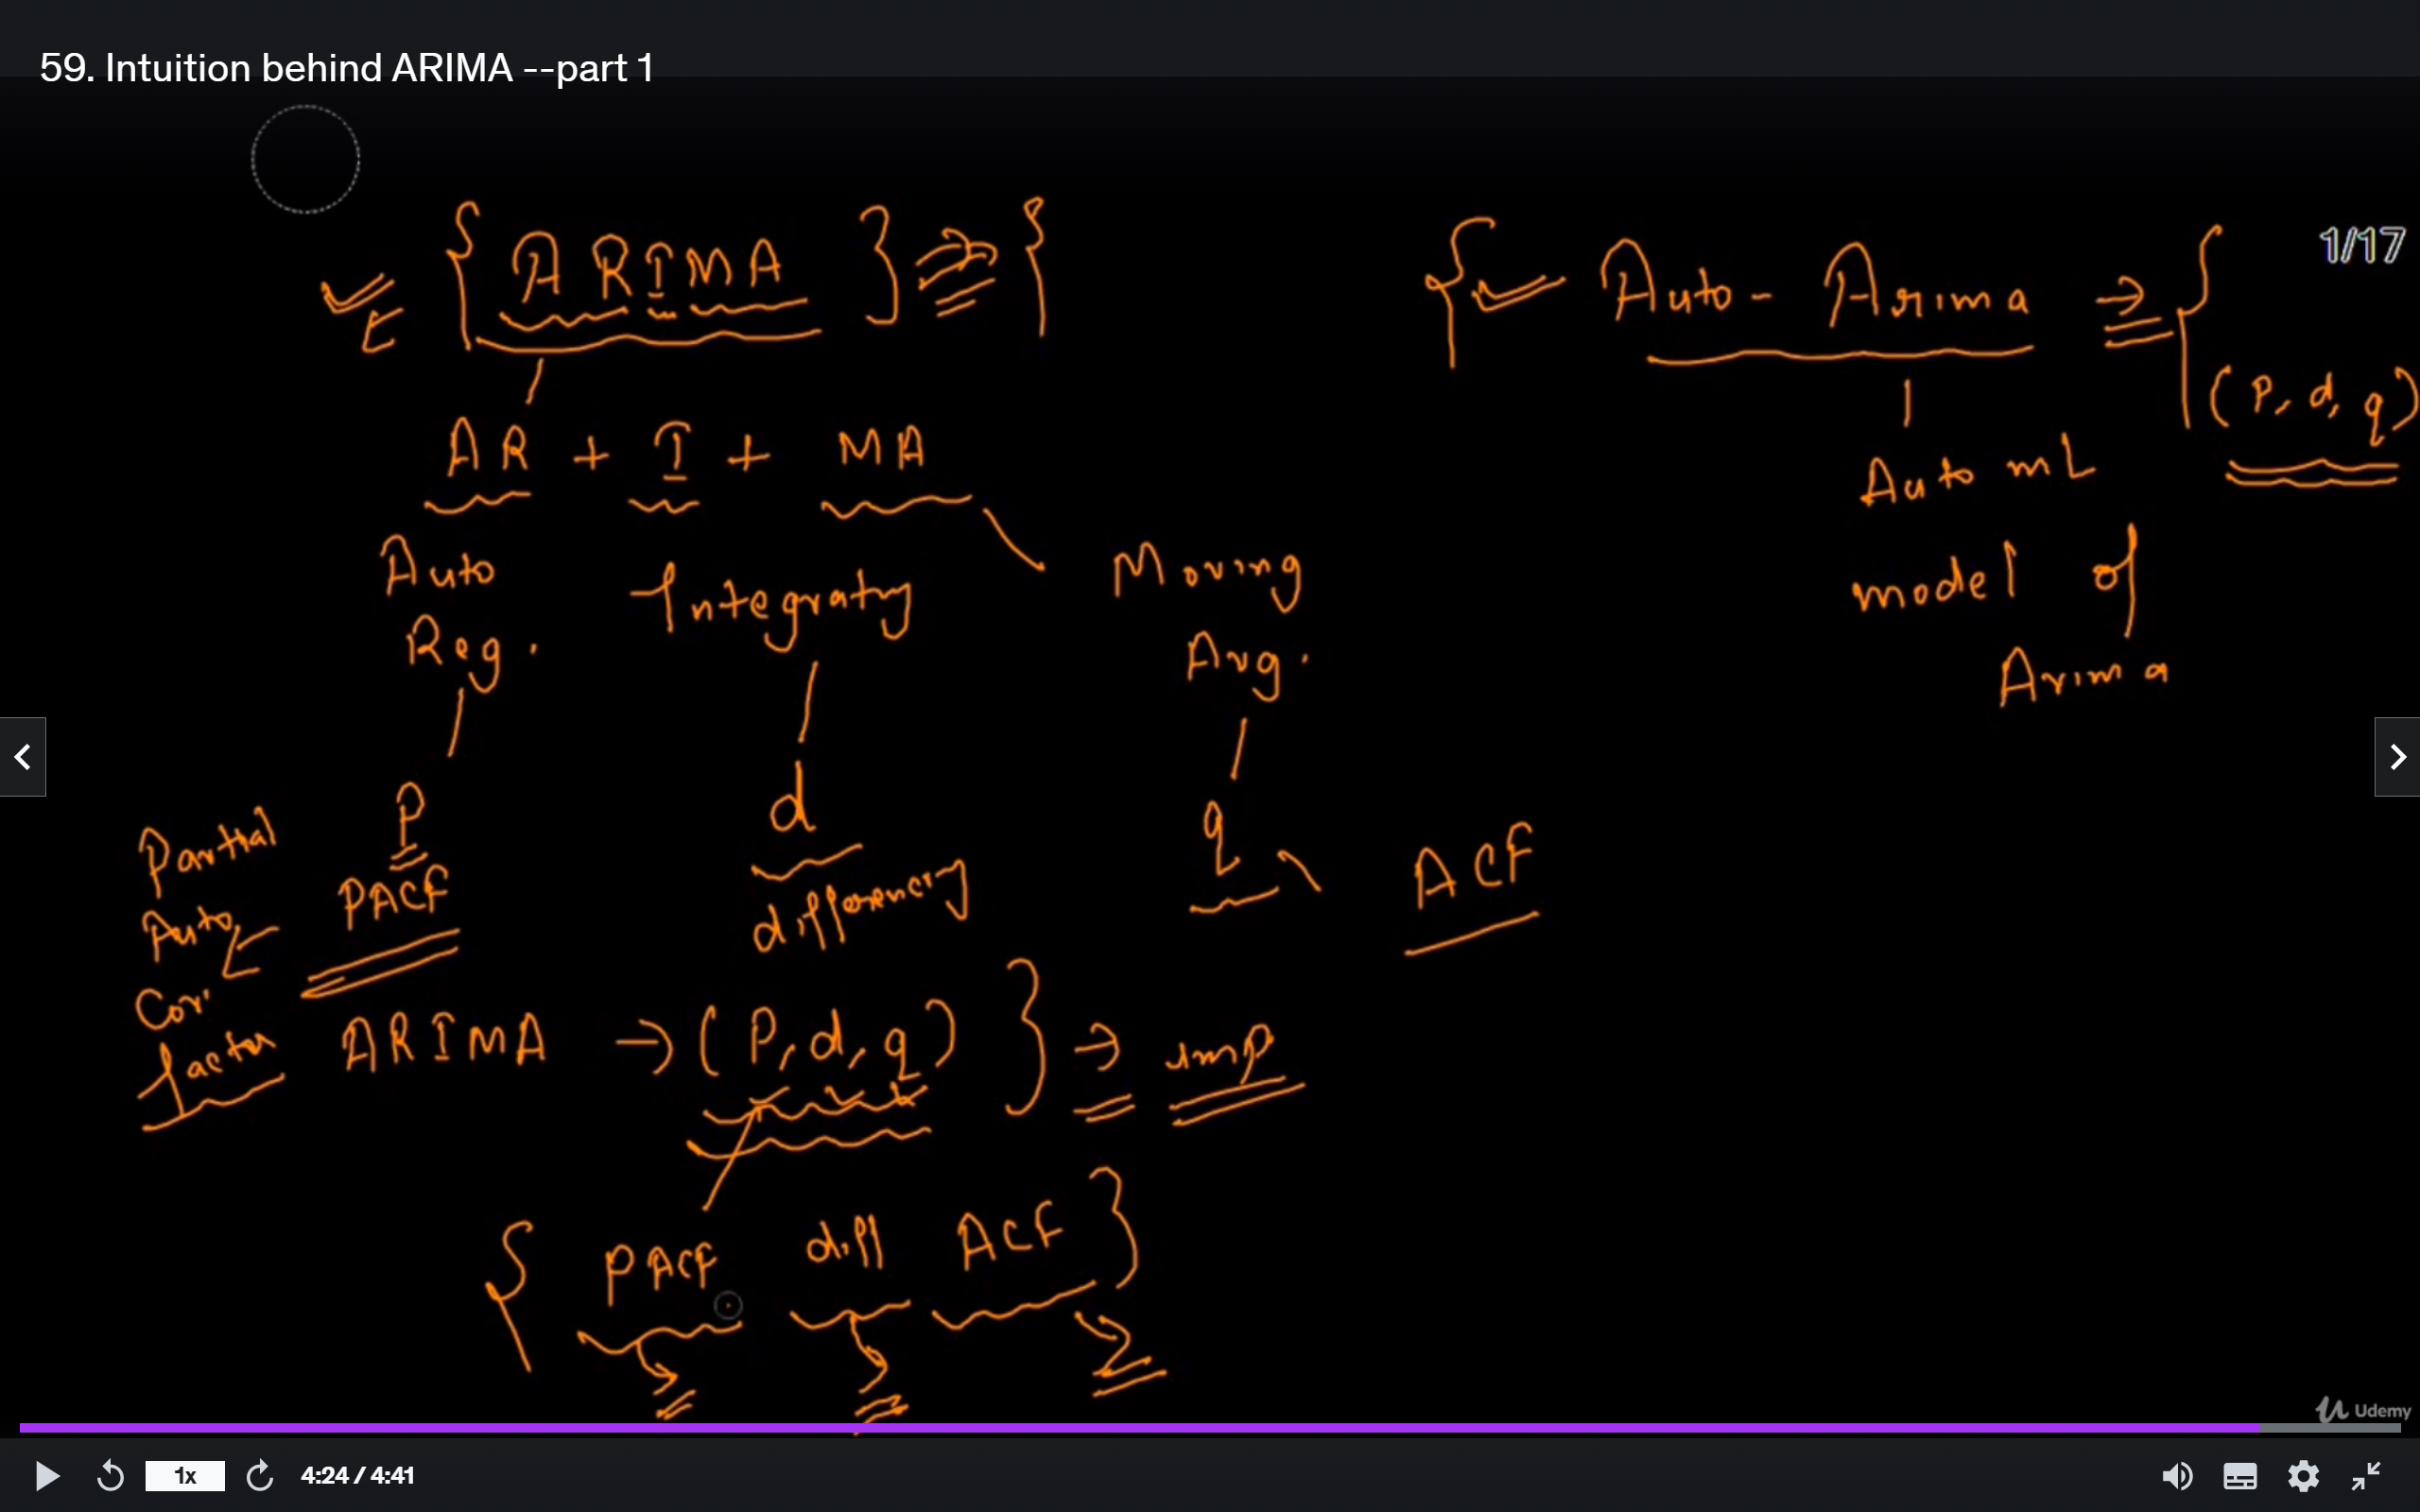

#### MA Model

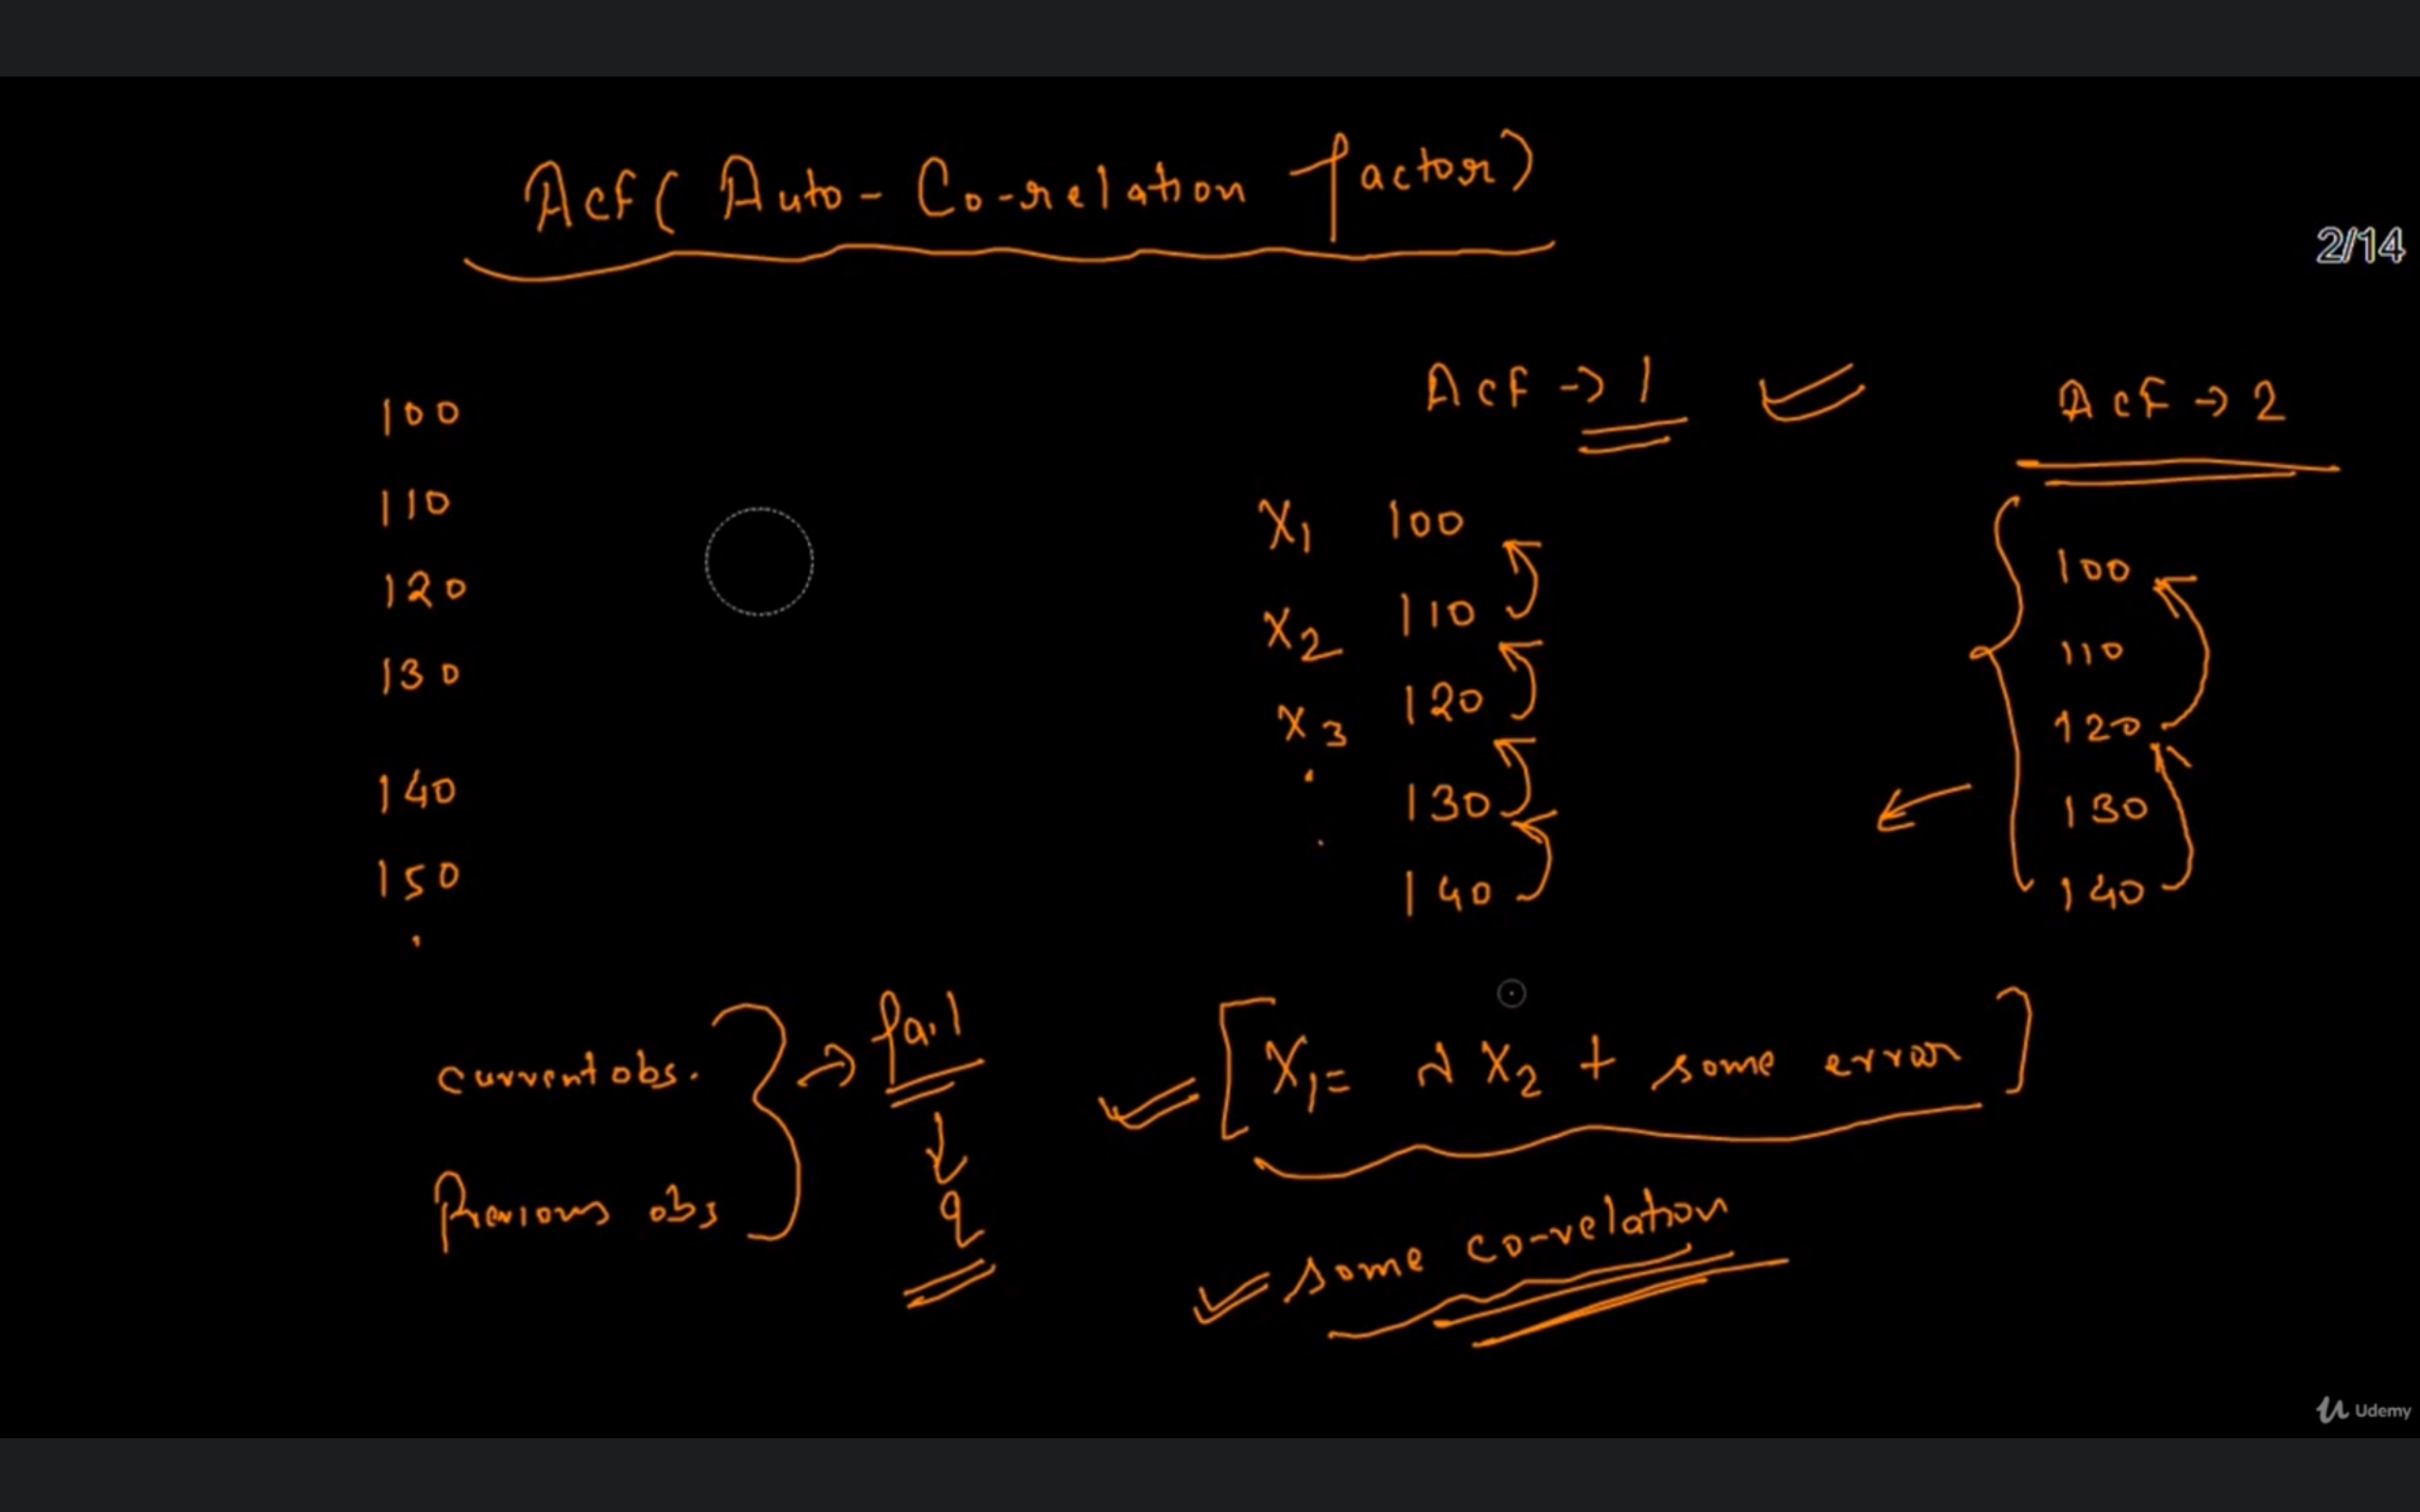

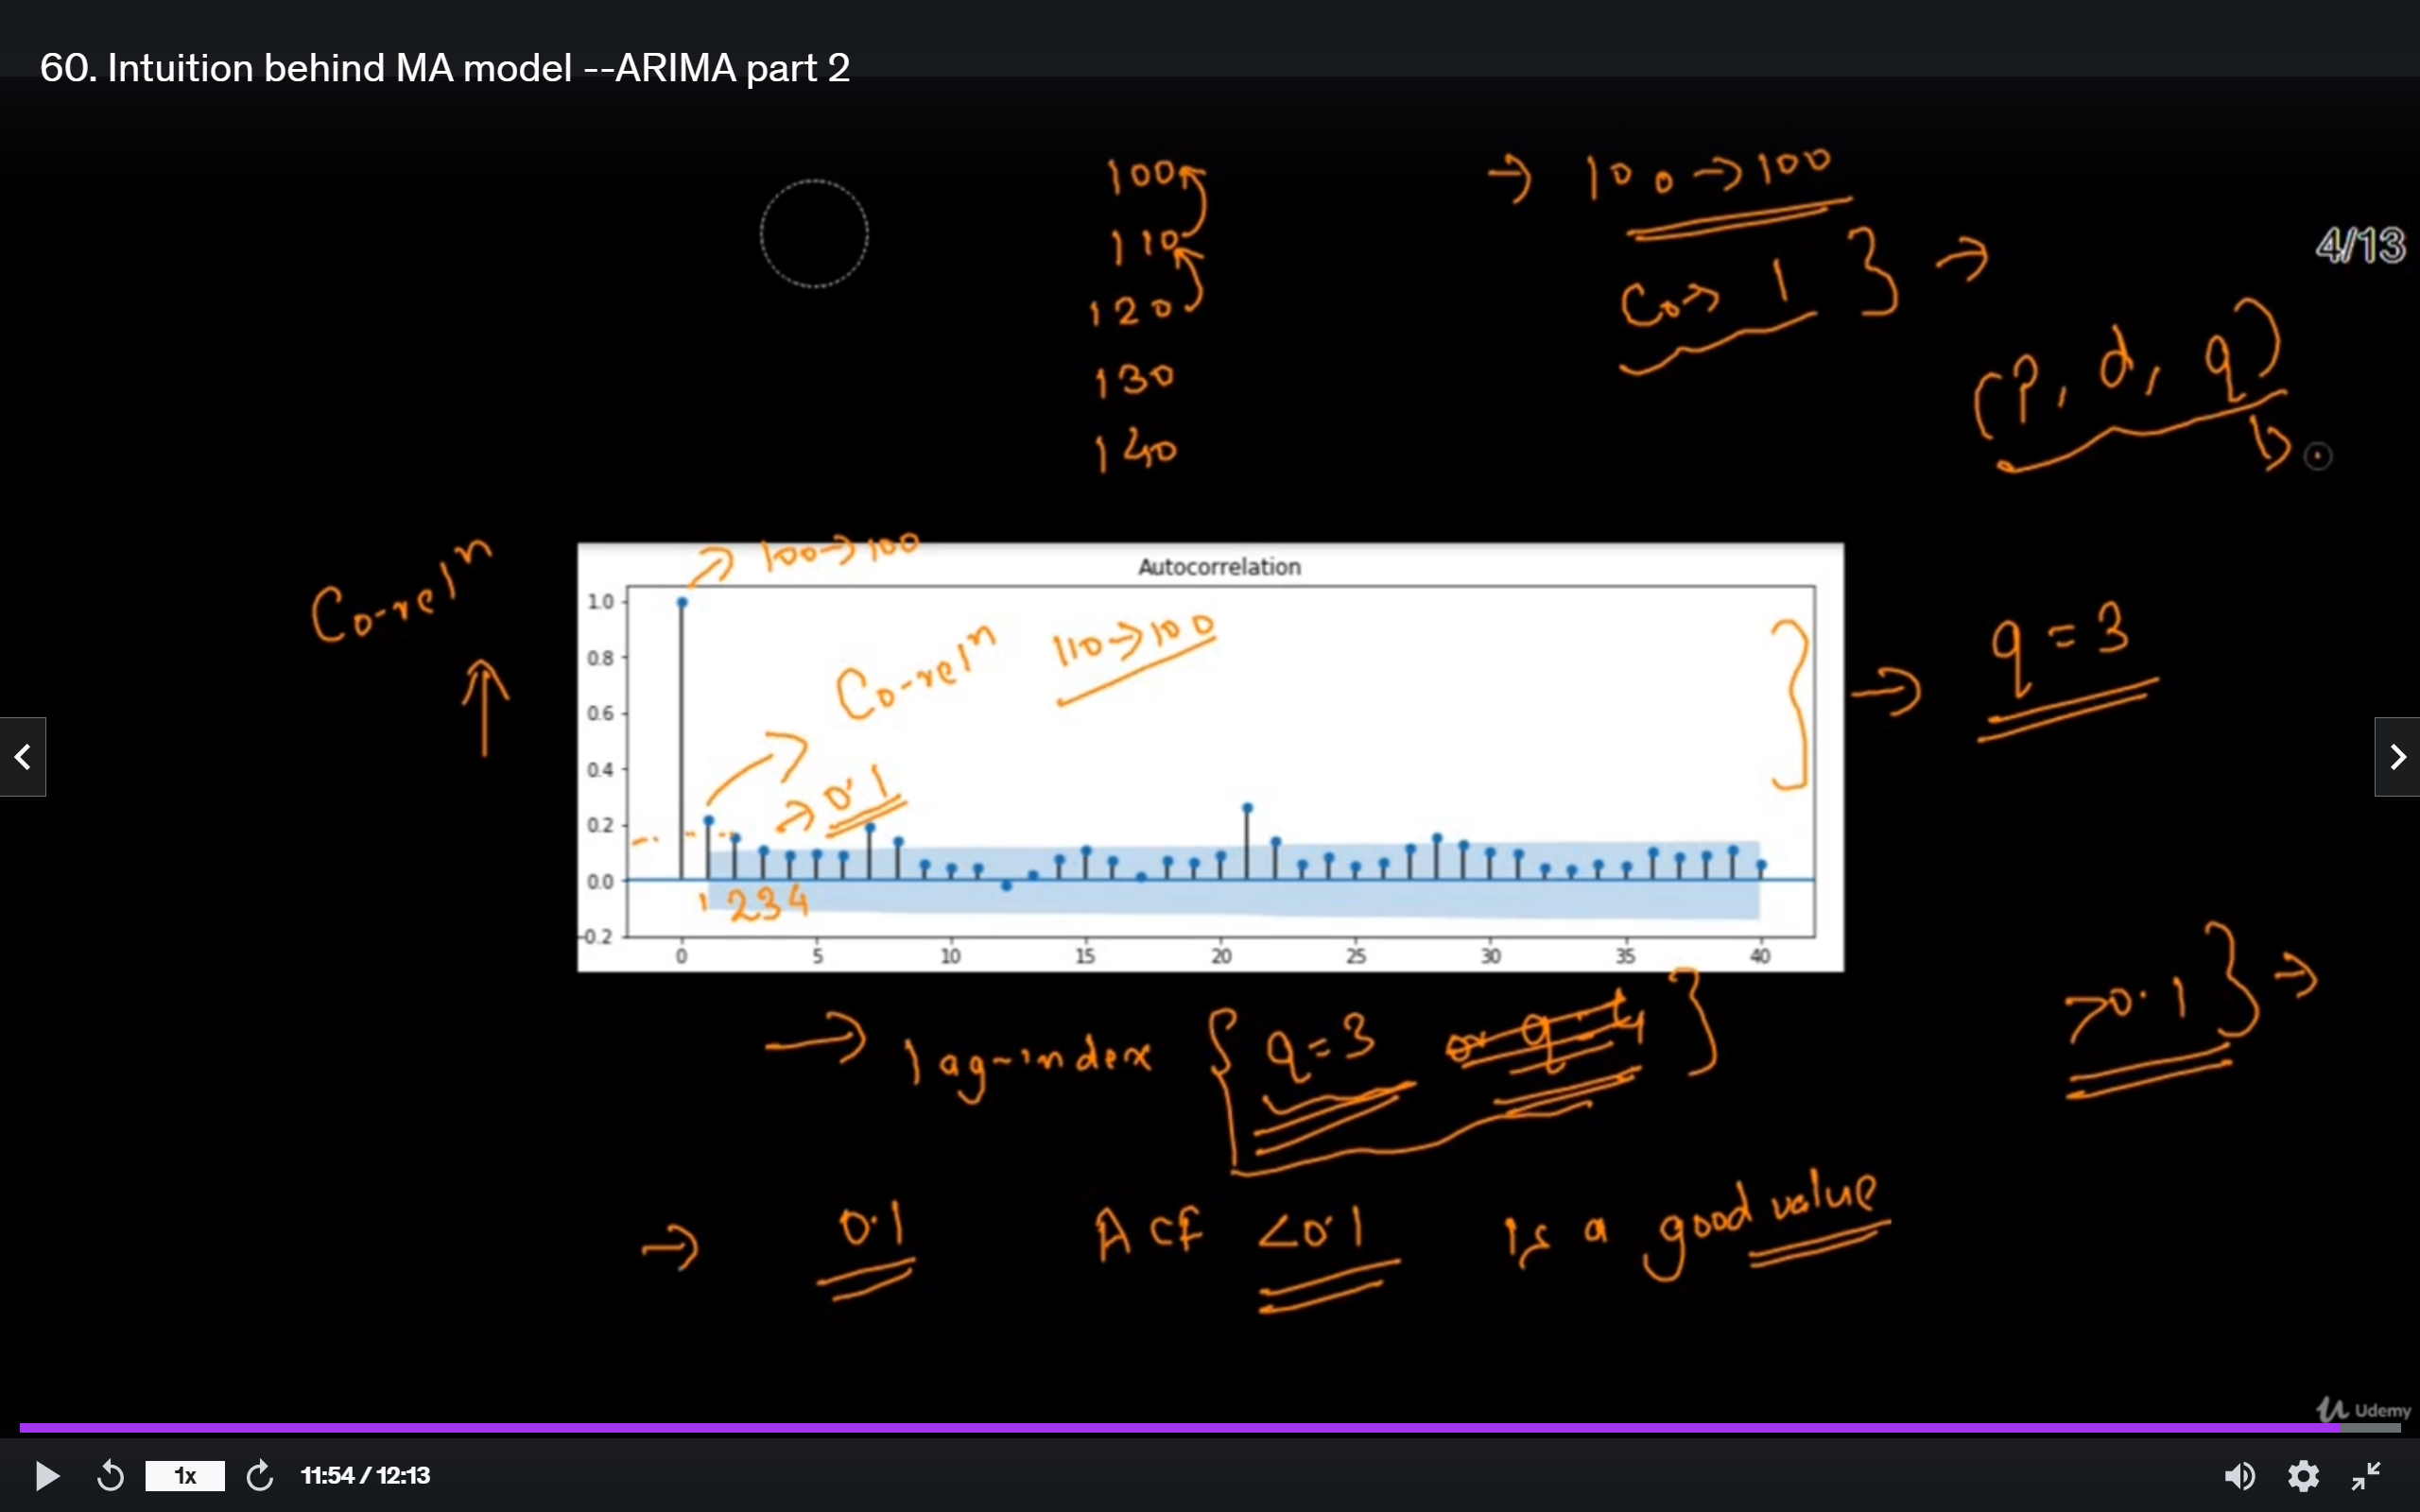

#### AR Model

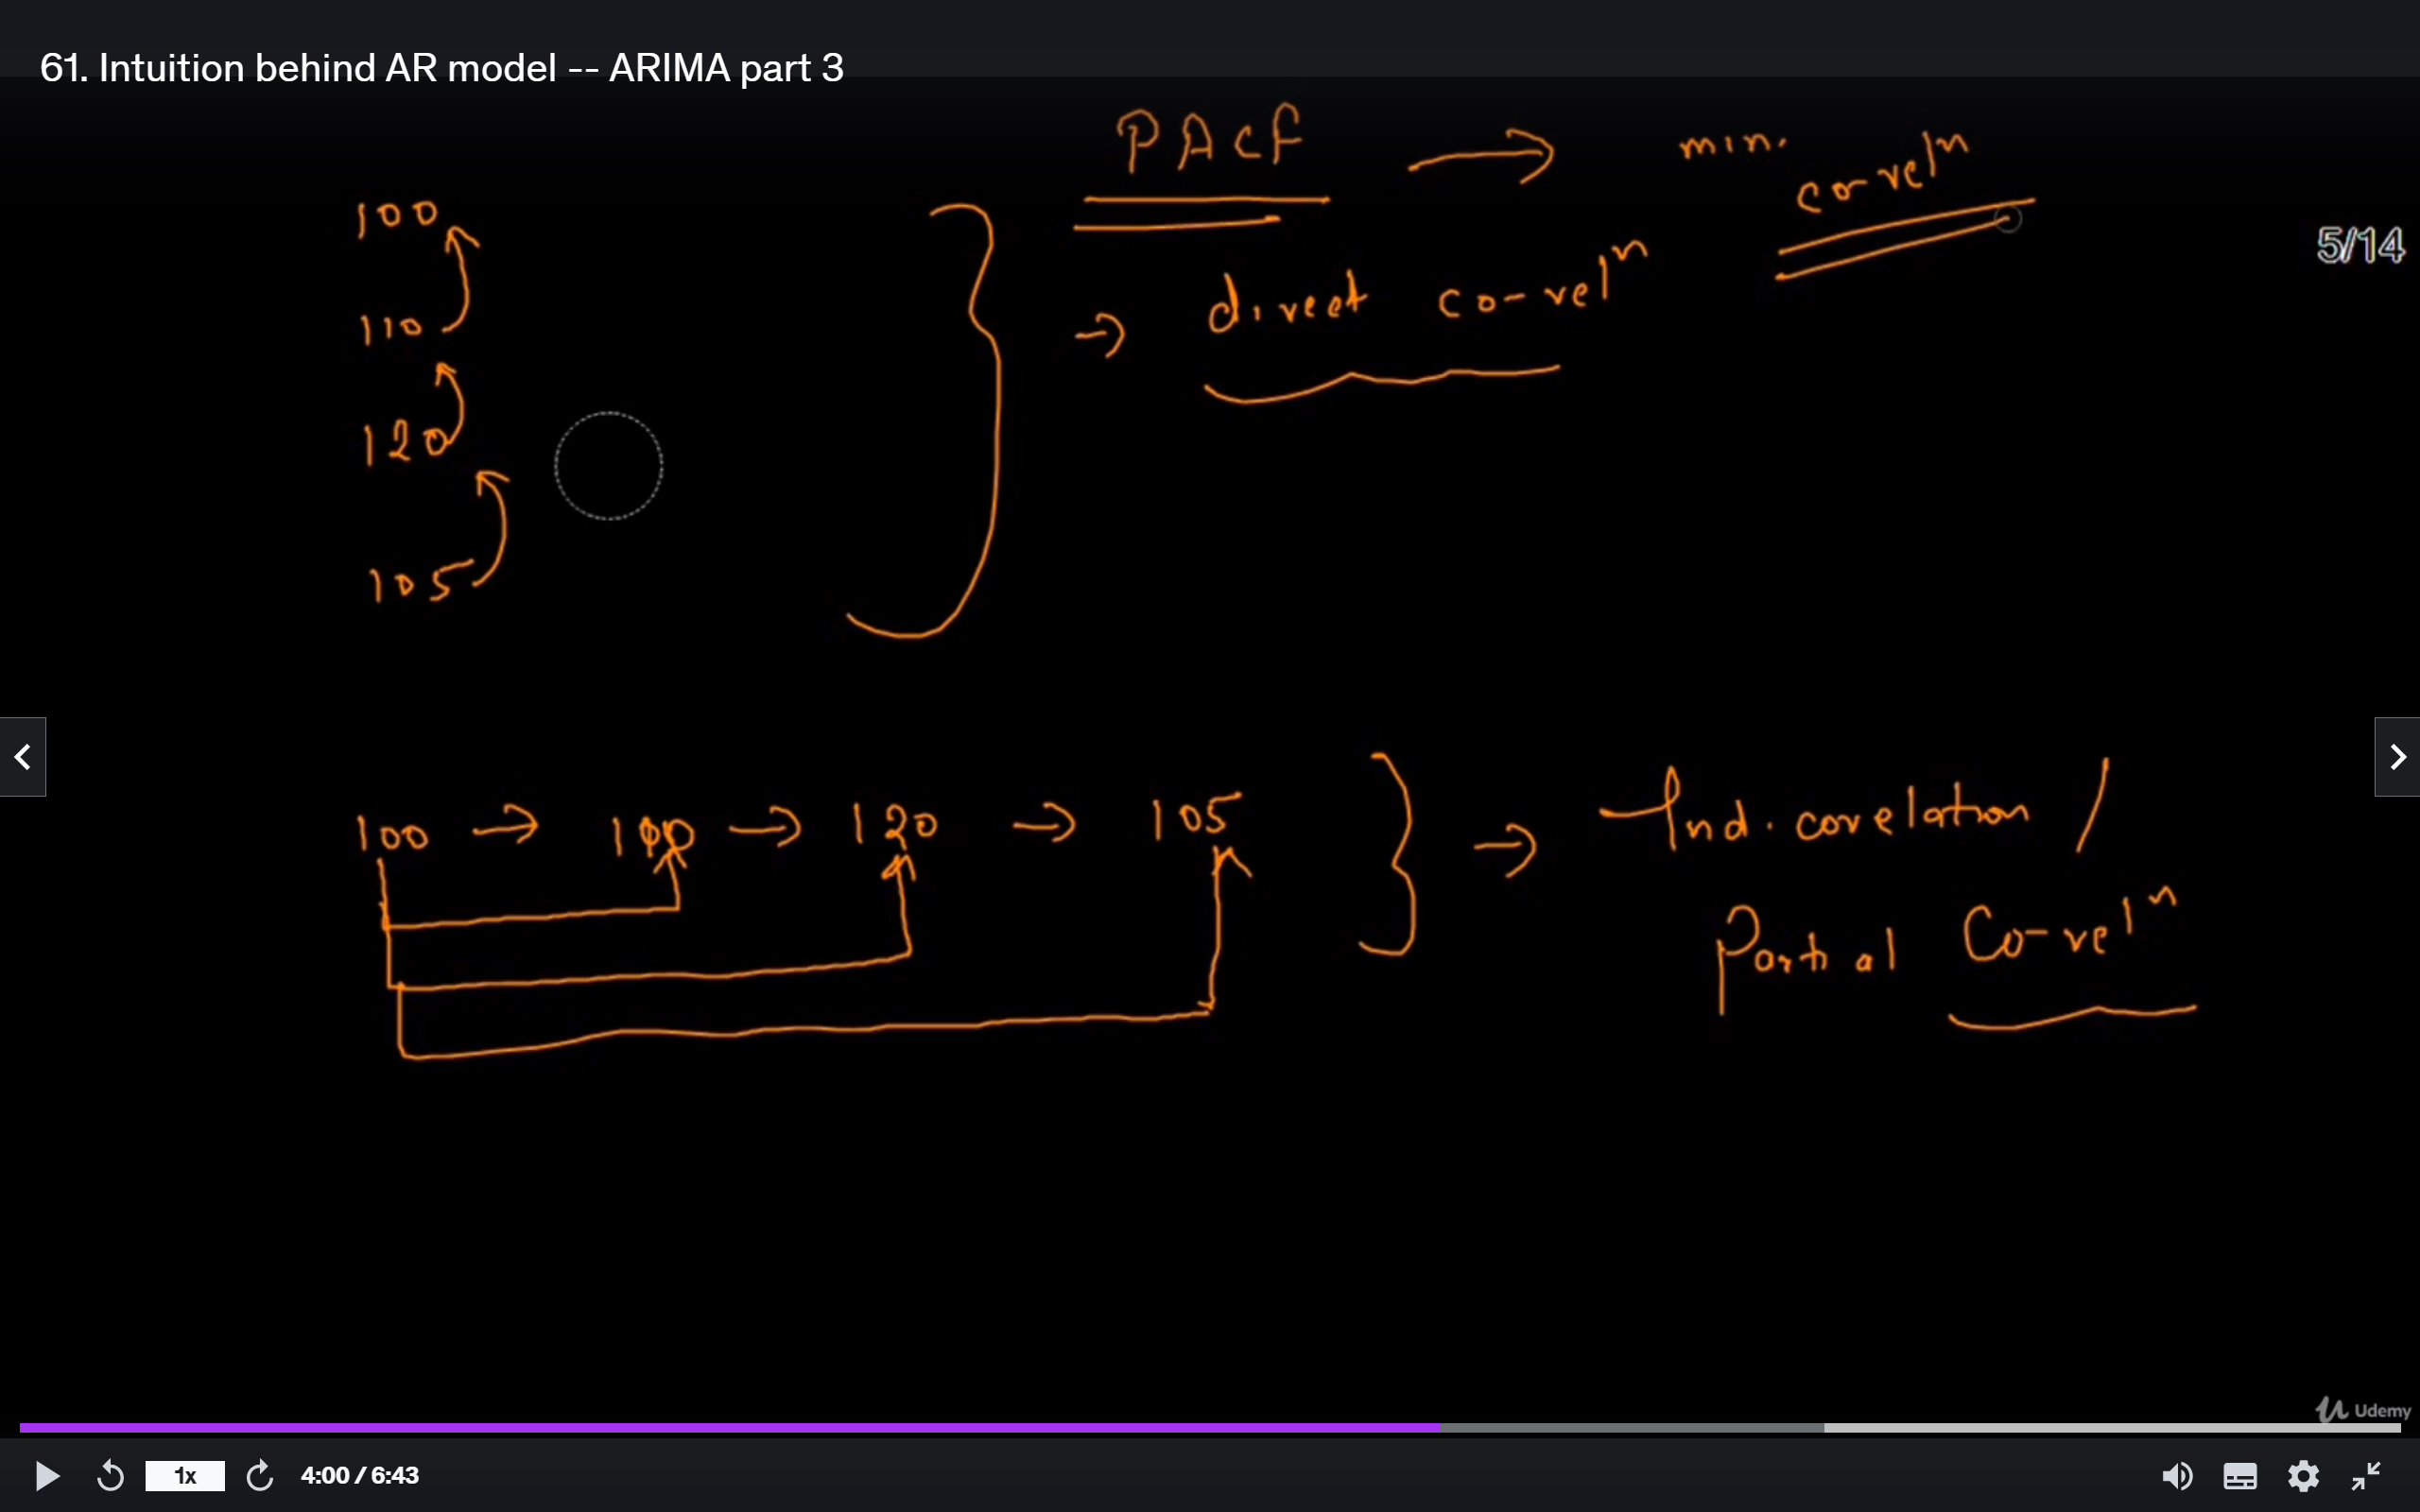

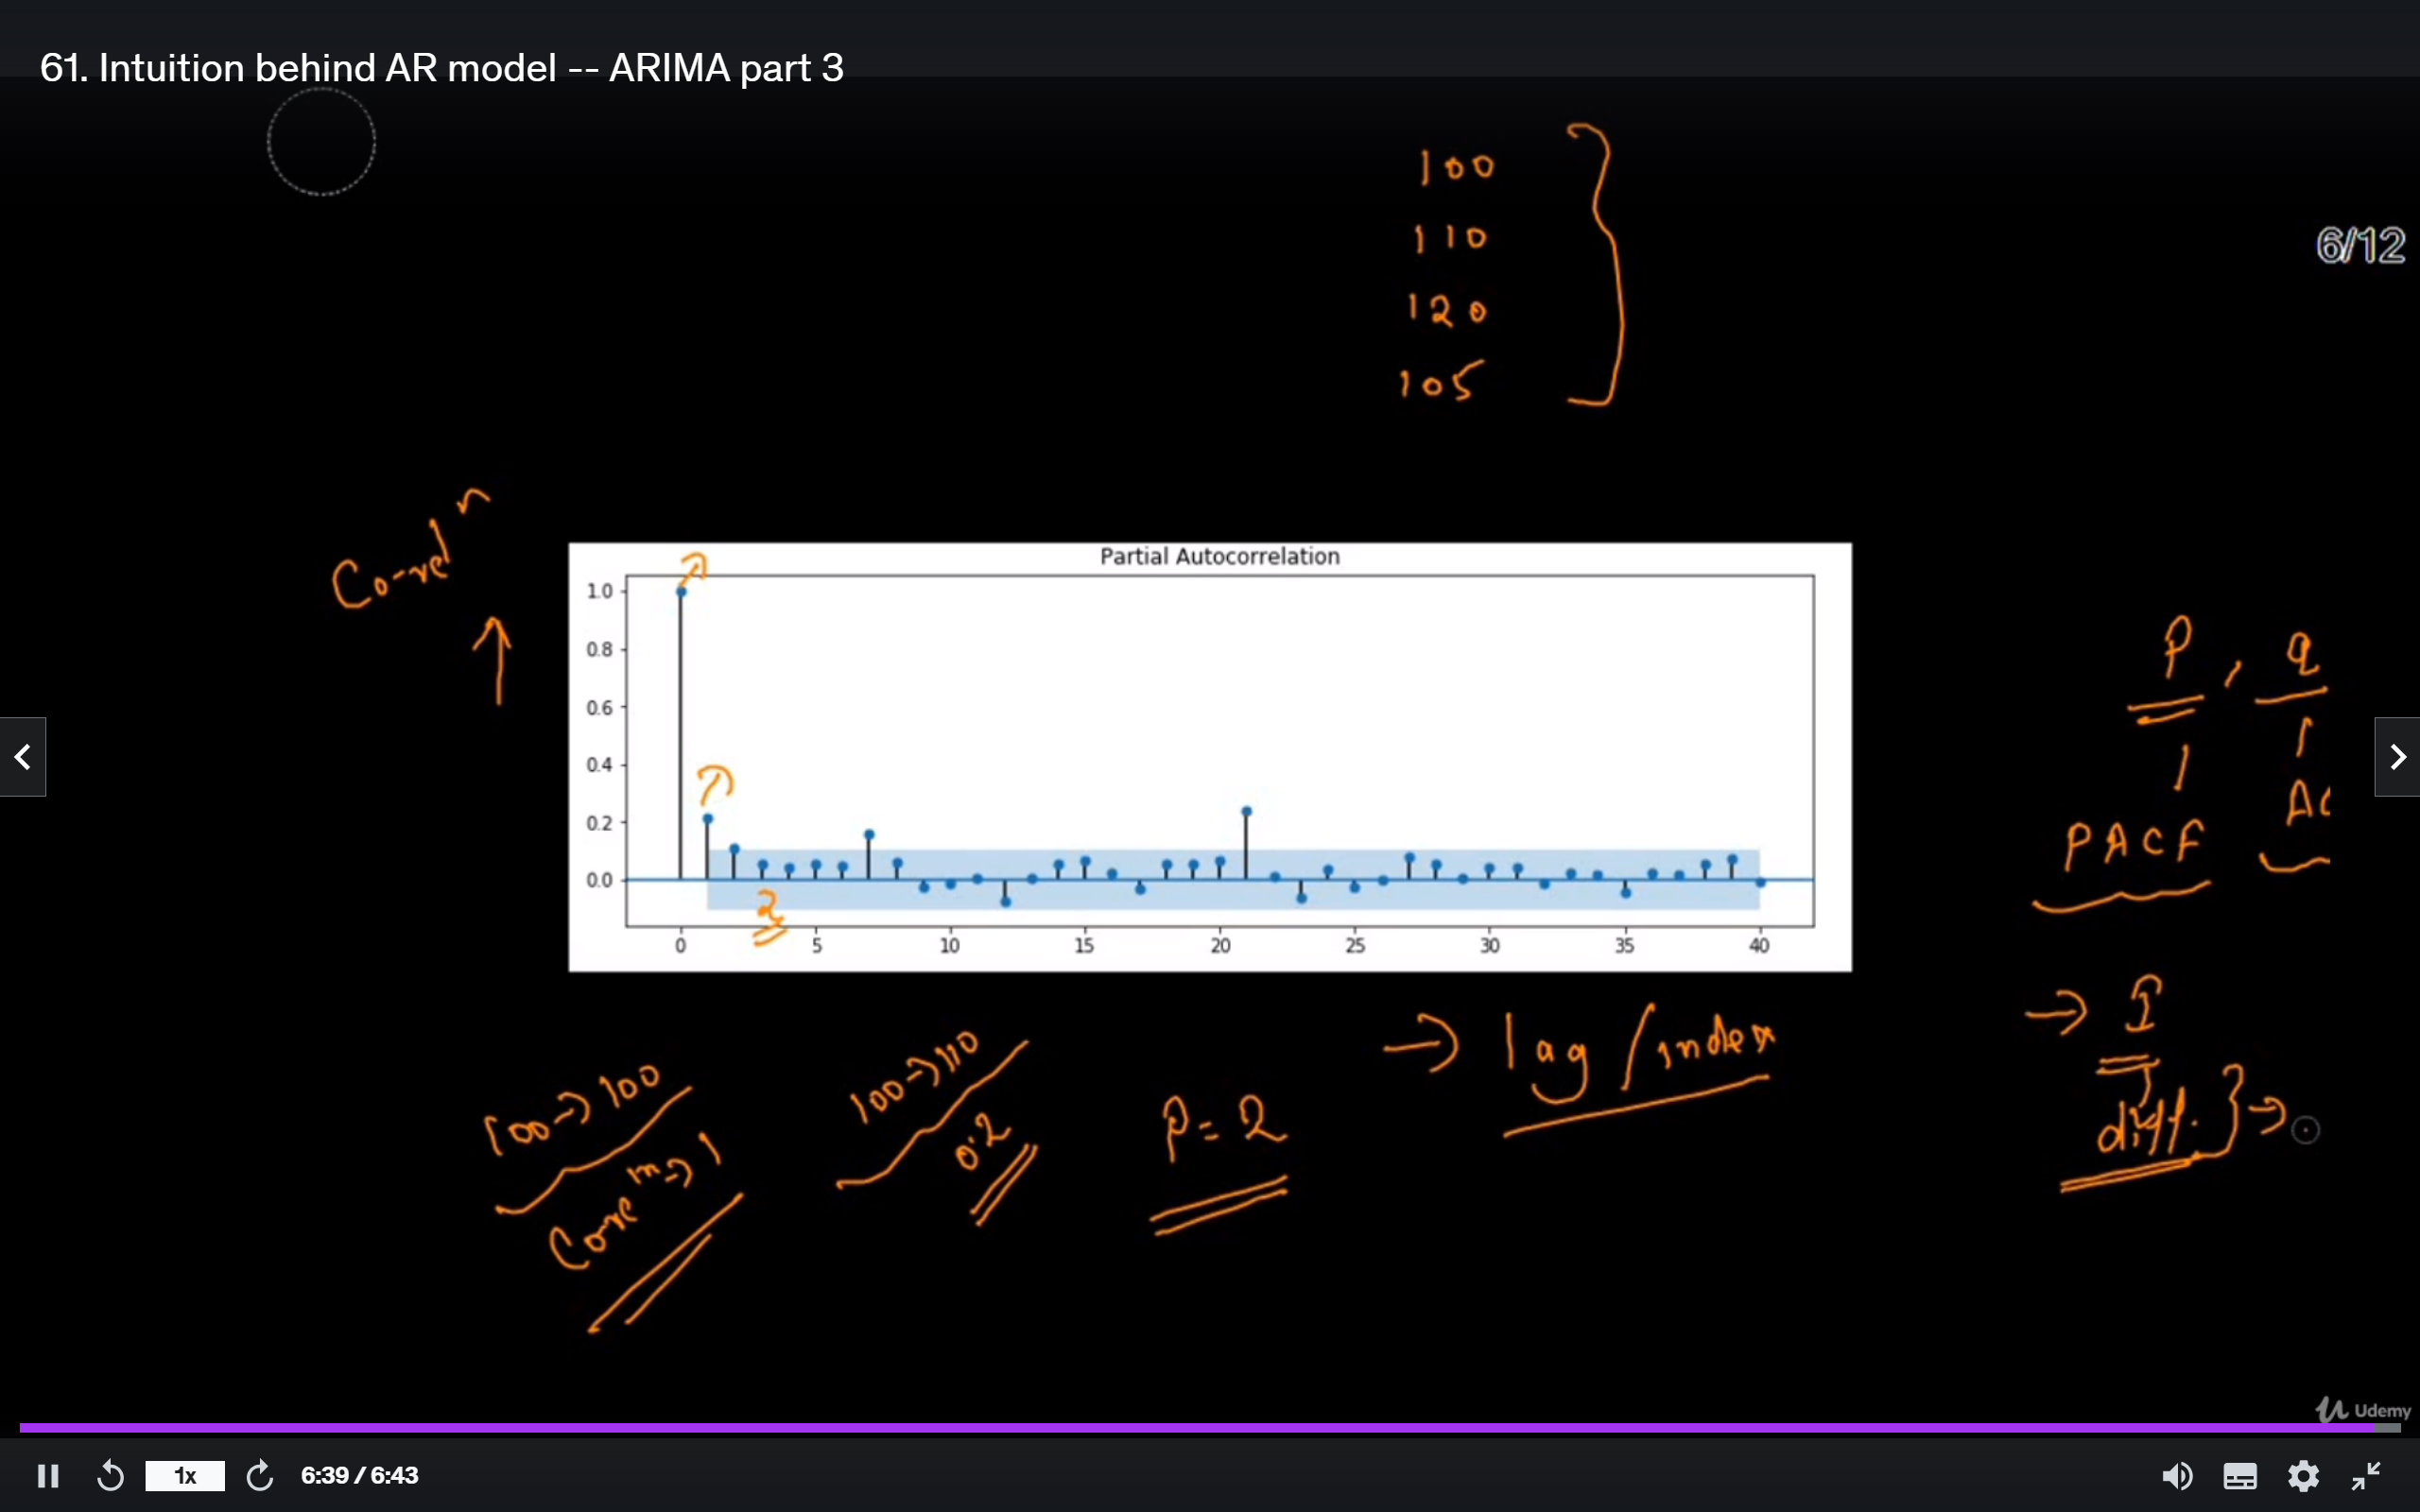

#### Integrating

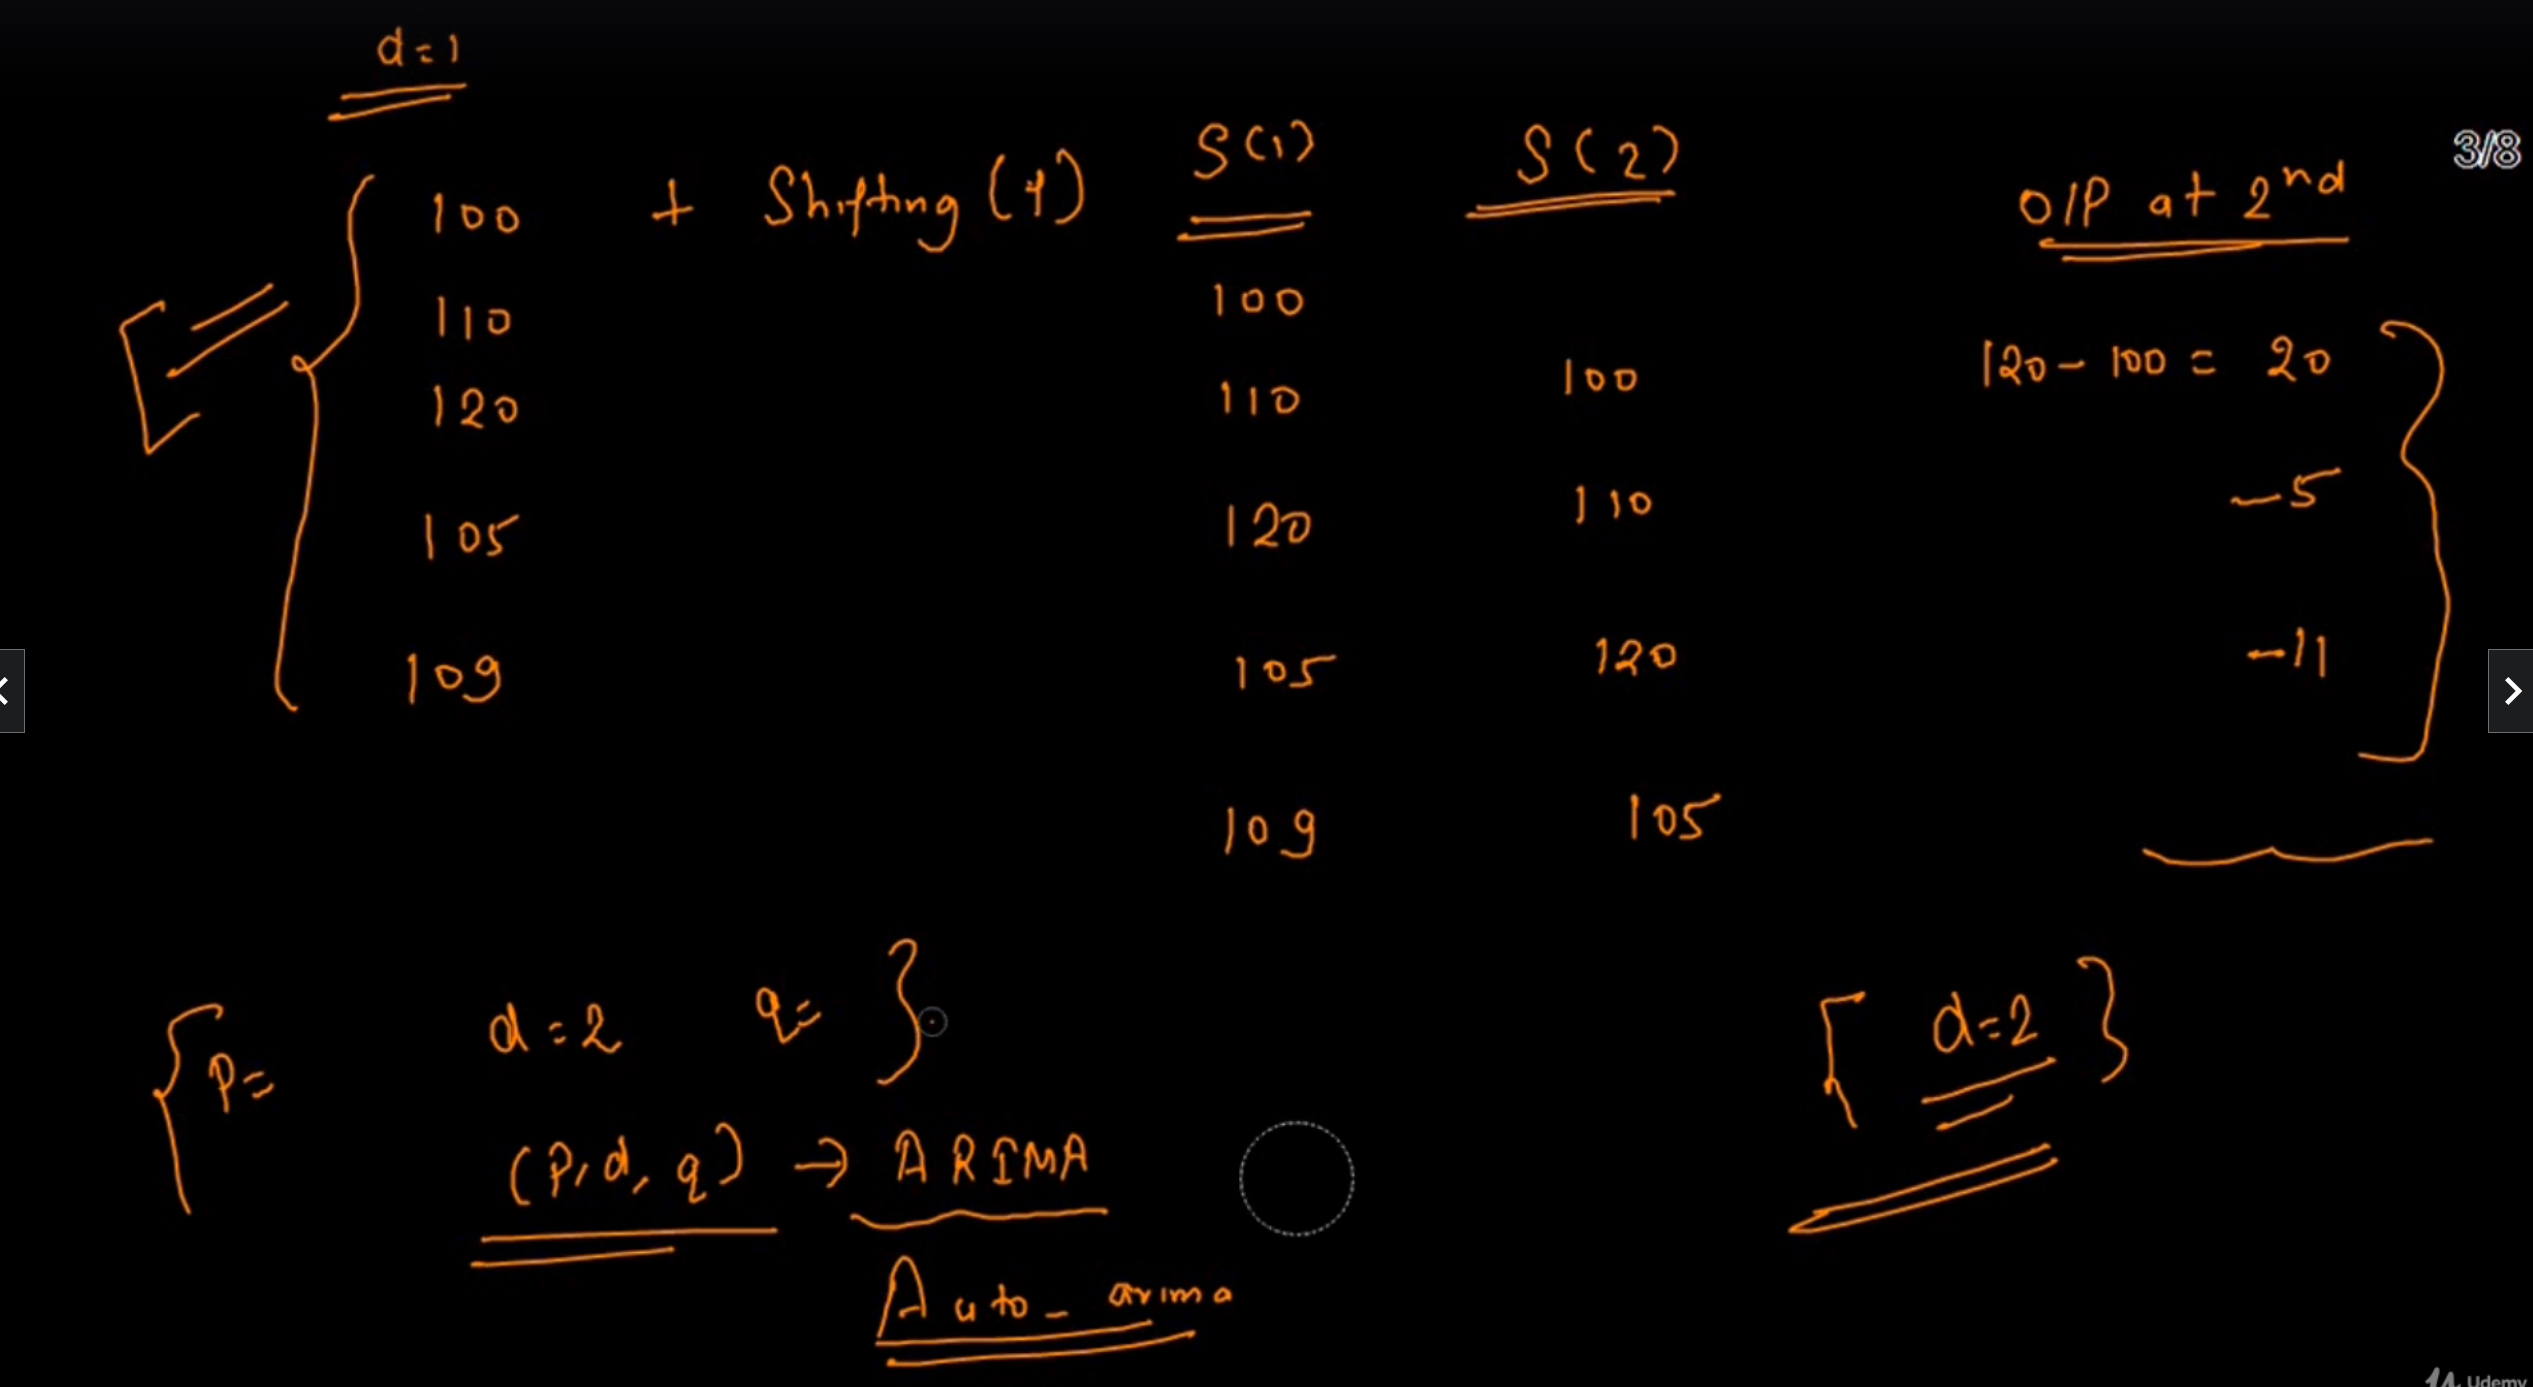

#### 3. Applying Auto-Arima (Time-Series Algorithm) on data

In [29]:
# pip install pmdarima

In [30]:
from pmdarima import auto_arima

In [31]:
model = auto_arima(y=training_data['VWAP'], X=training_data[ind_features])

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


In [32]:
model

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [33]:
model.fit(y=training_data['VWAP'], X=training_data[ind_features])

ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [34]:
forecast = model.predict(n_periods=len(test_data), X=test_data[ind_features])

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [35]:
forecast

1800    2600.741310
1801    2625.141319
1802    2600.985772
1803    2556.400865
1804    2572.844703
           ...     
2280    3447.804248
2281    3677.878046
2282    3685.160185
2283    3583.703991
2284    3392.965824
Length: 485, dtype: float64

In [41]:
forecast.values

array([2600.74131032, 2625.14131908, 2600.98577235, 2556.40086488,
       2572.84470313, 2509.13405079, 2223.63714157, 2289.44959042,
       2479.61844323, 2279.16741961, 2185.04375683, 2117.24513978,
       2083.25416622, 2153.53256835, 2115.93162492, 2030.21187366,
       1924.91939618, 1981.22242523, 2025.64278114, 2084.54676157,
       2139.76969865, 2060.61175503, 2186.16332148, 2156.65143252,
       2106.61625038, 2157.76519606, 2076.35677229, 2211.84289439,
       2240.67550995, 2243.64359481, 2296.70943332, 2304.51249111,
       2325.15199989, 2380.2423423 , 2335.95978077, 2341.33505368,
       2335.75817038, 2317.07203177, 2325.51040582, 2292.49939924,
       2312.35386488, 2328.49933269, 2309.42395144, 2355.83372499,
       2343.78114129, 2377.60838585, 2385.27736464, 2372.58955286,
       2382.22193262, 2378.8142619 , 2384.7022179 , 2447.68166205,
       2457.46353693, 2482.94579681, 2507.48141018, 2494.42059819,
       2452.90876791, 2441.70789105, 2428.10825542, 2377.57412

In [42]:
test_data['Forecast_ARIMA'] = forecast.values

<Axes: xlabel='Date'>

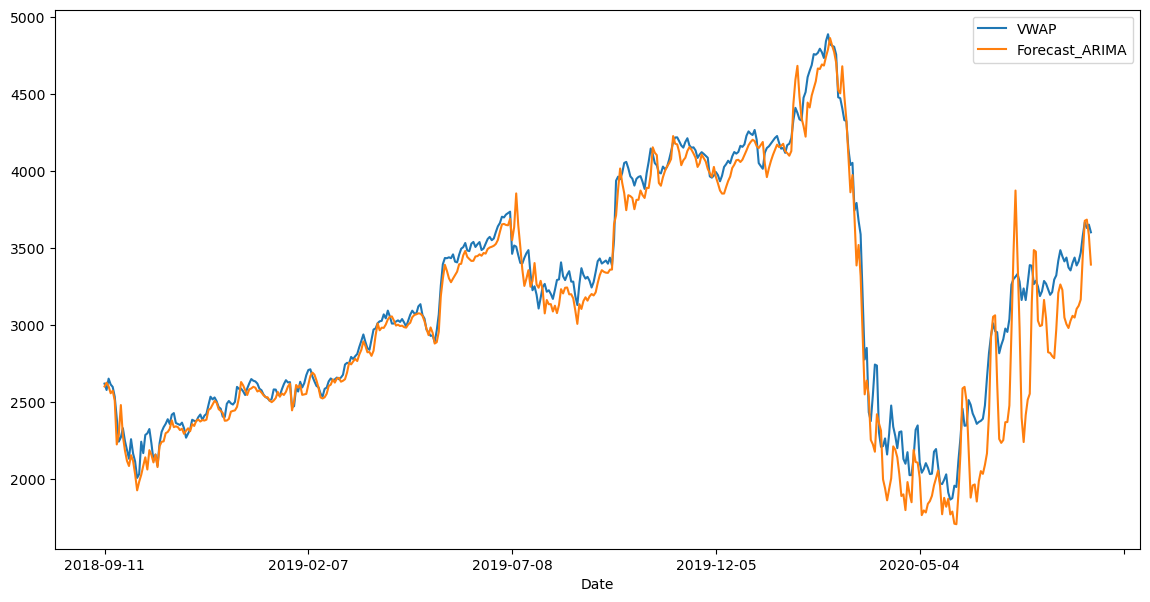

In [46]:
test_data[['VWAP', 'Forecast_ARIMA']].plot(figsize=(14,7))

#### 4. Evaluating Time Series Model

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [49]:
np.sqrt(mean_squared_error(test_data['VWAP'], test_data['Forecast_ARIMA']))

187.8287364960948

In [50]:
mean_absolute_error(test_data['VWAP'], test_data['Forecast_ARIMA'])

124.68673481578682